# Bay Wheels bike sharing in 2019
## by Eelke Brouwers

## Investigation Overview

The goal of the project was to find out when the bike-sharing bikes from Bay Wheels are used most often and whether the duration of trips depends on different time factors and user type. The main insights I gained are: 
- Bikes are most frequently used during weekdays, and more specifically in the morning and evening rush hours (8am and 5pm respectivily). On weekends most trips are started between 11am and 4pm, peaking at 2pm. Seen throughout the year, the months March, April and October are the months with the most trips, while the least trips are made during December. 

- The duration of trips fluctuates throughout the day, but the direction of this fluctuation is complicated as appears from comparing dataset including and excluding outliers. 

- Customers make on average longer bike trips than subscribers, especially on weekends. 

## Dataset Overview

The dataset contains data from Bay Wheels on bike sharing in greater Fransisco Bay area. The company was established in 2013 and operate under different names, starting with Bay Area Bike Share, then Ford GoBike in June 2017 and eventually they became Bay Wheels in June 2019. Data on their bike sharing system are available online at https://s3.amazonaws.com/baywheels-data/index.html, where they share data on the duration of trips, information on the start and end station (including id, name, latitude and longitude), bike id, user type (costumer/subscriber) and rental access method (app/zipper). Through Udacity I also obtained data on the age and gender of users, but only for the month February. 

In this report I analyzed the data from 2019, focussing on the frequency and the duration of bike trips throughout the day, week and year, and for different user types (customer/subscriber). 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike2019_clean = pd.read_csv('2019_baywheels_tripdata_clean.csv')
data = pd.read_csv('2019_baywheels_tripdata_master.csv')
df_no_outliers= pd.read_csv('2019_baywheels_tripdata_master_no_outliers.csv')
data_member = pd.read_csv('2019_baywheels_tripdata_member')

## Distribution of bike-sharing trips in 2019

Most bike-sharing trips are made in March, April and October, the least in December. From day to day most bike trips are made on weekdays, where the number of trips peak around 8 in the morning and 5 in the afternoon. On weekends considerably less trips are made, peaking around 2 in the afternoon. 

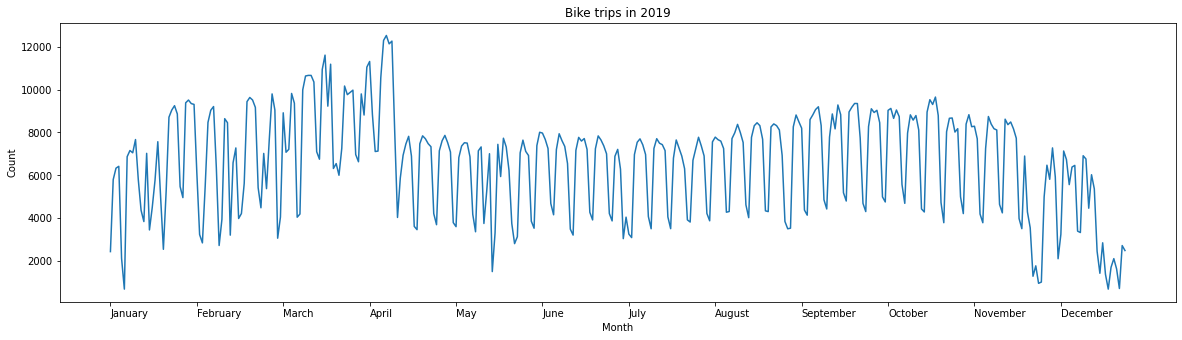

In [3]:
fig = plt.figure(figsize=[20,5])
ax = fig.add_axes([.125,.125,.775,.775])

# Count bike trips per date
date_freq = data.groupby('start_date').size()
date_freq = date_freq.reset_index(name='count')

# Plot
sb.lineplot(data=date_freq, x=date_freq['start_date'].astype(str), y='count')
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor') # Align labels to ticks
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Bike trips in 2019')

# Reduced number of ticks on x-axis
plt.xticks(range(0,365,31),rotation=0, ha='left')

# Create new labels for x axis
new_labels = ['January', 'February','March','April','May','June','July','August','September','October','November','December']

# Set the new tick labels
ax.set_xticklabels(new_labels);

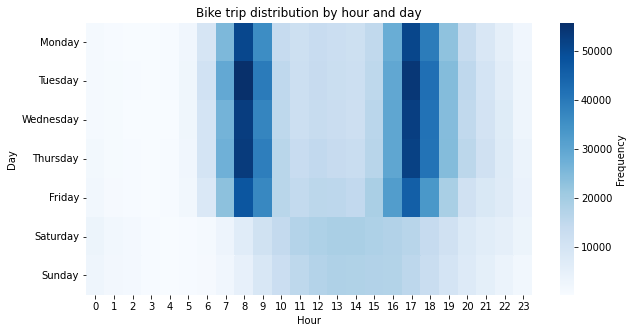

In [4]:
# Heatmap of number of trips by hour for different days
fig = plt.figure(figsize=[10,5])
data_plot = data.groupby(["start_day", "start_hour"], sort=False).size()
data_plot = data_plot.reset_index(name='count')
data_plot = data_plot.pivot(index = "start_day", columns = "start_hour", values = 'count')

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_plot = data_plot.reindex(order)
sb.heatmap(data_plot, annot = False, cmap="Blues", cbar_kws = {'label' : 'Frequency'})
plt.xlabel('Hour')
plt.ylabel('Day')
plt.title('Bike trip distribution by hour and day');

## Bike trip durations by hour and day

The average bike trip duration changes during the day, but the change is dependent on the inclusion or exclusion of outliers. During the night the average trip duration is variable, but during the day a strong patterns is seen in which the early morning and late evening are characterized by short trips and the longer trips around mid-day. On weekends this pattern holds largely, only the early morning drop is not observed. Removing outliers at the high end reduces the average bike trip duration considerably and shows another pattern, one where the longer bike trips are made both around 8 in the morning and 5 in the afternoon. This discrepancy makes it very hard to draw conclusions without spending more time on finding a more accurate method for detecting outliers. 

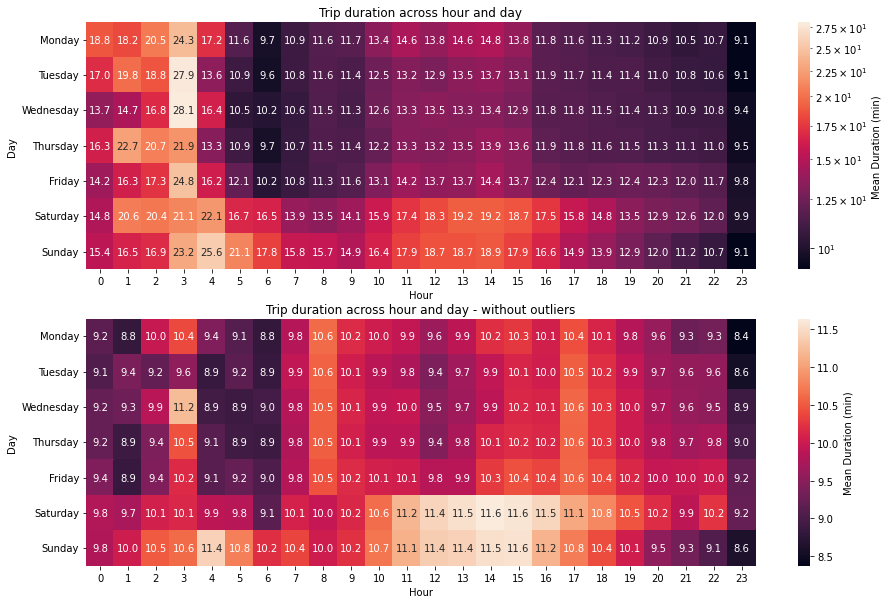

In [5]:
from matplotlib.colors import LogNorm, Normalize
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Heatmap of duration of trips by hour for different days
fig = plt.figure(figsize=[15,10])

# Subplot 1
plt.subplot(2,1,1)
duration_means = data.groupby(["start_day", "start_hour"]).mean()['duration_min']
duration_means = duration_means.reset_index(name = 'duration_min_avg')
duration_means = duration_means.pivot(index = 'start_day', columns = 'start_hour', values = 'duration_min_avg')
duration_means = duration_means.reindex(order_days)

sb.heatmap(duration_means, annot = True, fmt = '.1f', cbar_kws = {'label' : 'Mean Duration (min)'}, norm=LogNorm())

plt.title('Trip duration across hour and day')
plt.ylabel('Day')
plt.xlabel('Hour')

# Subplot 2
plt.subplot(2,1,2)
duration_means = df_no_outliers.groupby(["start_day", "start_hour"]).mean()['duration_min']
duration_means = duration_means.reset_index(name = 'duration_min_avg')
duration_means = duration_means.pivot(index = 'start_day', columns = 'start_hour', values = 'duration_min_avg')
duration_means = duration_means.reindex(order_days)

sb.heatmap(duration_means, annot = True, fmt = '.1f', cbar_kws = {'label' : 'Mean Duration (min)'})

plt.title('Trip duration across hour and day - without outliers')
plt.ylabel('Day')
plt.xlabel('Hour')

plt.show;

## Relationship bike trip duration and user type

The mean duration of bike trips seem to differ depending on the type of users. Customers make on average longer bike trips, regardless of the day. The effect is the most pronounced on weekends. The results were similar for data in which outliers were included as well as excluded. Here, data without outliers are visualized. 

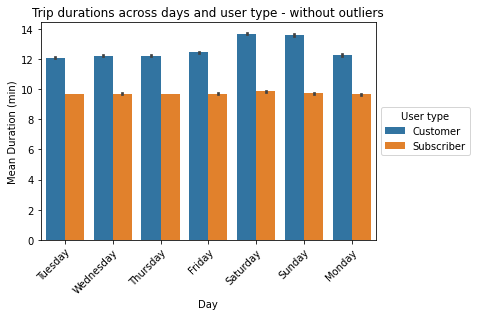

In [6]:
sb.barplot(data = df_no_outliers, x = 'start_day', y = 'duration_min', hue = 'user_type')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.legend(title='User type', bbox_to_anchor = (1, 0.5), loc = 6)
plt.ylabel('Mean Duration (min)')
plt.title('Trip durations across days and user type - without outliers')
plt.xlabel('Day');

In [ ]:
# Convert to slides
!jupyter nbconvert Part_II_slides_baywheels_2019.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slides_baywheels_2019.ipynb to slides
[NbConvertApp] Writing 609352 bytes to Part_II_slides_baywheels_2019.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slides_baywheels_2019.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /us